# Agrupacion K-means

## 1.- Importando paquetes y el conjunto de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/aldochavez/datasets/main/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## 2.- Exploracion de los Datos

**El método 'info()'los tipos y números de datos**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [3]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
10%,2.56000,56.900000,45.000000,10.670000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
90%,13.32000,279.600000,83.200000,32.400000
max,17.40000,337.000000,91.000000,46.000000


### 2.1.- Exploracion Grafica

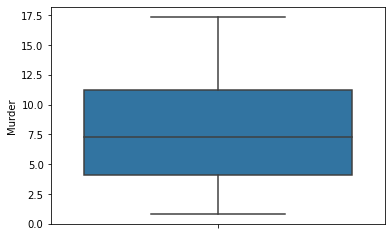

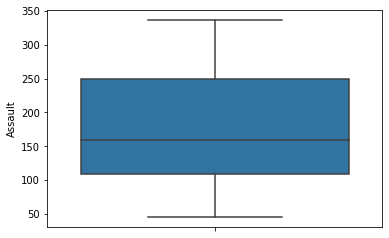

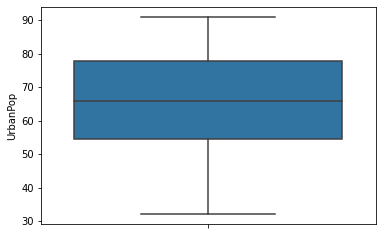

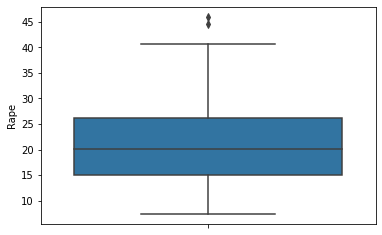

In [4]:
for columna in df.columns:
  sns.boxplot(y=columna, data=df)
  plt.show()

## 3.- Modelado

**Empezaremos modelando el algoritmo K Means**

In [5]:
# Definimos las variables X
predictoras = ['Murder','Assault','UrbanPop','Rape']

In [6]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
#Visualizamos las variables X
print('\n\nVisualizamos las variables (X)')
display(X)



Visualizamos las variables (X)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


### 3.1.- K Means ++

In [12]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3, random_state=123)

In [13]:
# Entrenamiento del modelo
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

**¿Cuáles son los centroides de grupo?**

In [20]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ]])

**¿Que Conclusiones podriamos sacar acerca de los centroides?**, **¿Que acciones recomendarias?**


In [22]:
pd.DataFrame(clus_cent, columns=df.columns)

ValueError: ignored

**¿Cuáles son las etiquetas del clúster?**

In [16]:
kmeans.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [17]:
#Creando la columna Cluster
df['Cluster'] = kmeans.labels_
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


In [23]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))

Inercia: 47964.26535714286


### 3.2.- K Means (Escalado Estandar)

In [24]:
#Obtenemos la funcion para escalar por la media y la desviacion estandar
from sklearn.preprocessing import StandardScaler
#Creamos el objeto scaler
scaler = StandardScaler()

In [26]:
#Visualizamos la data antes de Escalar
print("Data antes de Estandarizar...")
display(X.head(5))
X_Scaled_Media = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
print("\nData despues de Estandarizar...")
display(X_Scaled_Media.head(5))

Data antes de Estandarizar...


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6



Data despues de Estandarizar...


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [31]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3, random_state=123)

In [32]:
# Entrenamiento del modelo
kmeans.fit(X_Scaled_Media)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

**¿Cuáles son los centroides de grupo?**

In [34]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[-0.41081687, -0.32571014,  0.4740874 , -0.20357044],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144]])

**¿Que Conclusiones podriamos sacar acerca de los centroides?**, **¿Que acciones recomendarias?**


In [35]:
pd.DataFrame(clus_cent, columns=X.columns)

,Murder,Assault,UrbanPop,Rape
0,-0.410817,-0.325710,0.474087,-0.203570
1,-0.971303,-1.117836,-0.939550,-0.976578
2,1.053771,1.073403,0.193714,0.861041


In [36]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))

Inercia: 80.0888613219962


### 3.3.- K Means (Escalado Min Max)

In [37]:
#Obtenemos la funcion para escalar por el maximo y el minimo
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto scaler
scaler = MinMaxScaler()

In [38]:
#Visualizamos la data antes de Escalar
print("Data antes de Estandarizar...")
display(X.head(5))
X_Scaled_MinMax = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
print("\nData despues de Estandarizar...")
display(X_Scaled_MinMax.head(5))

Data antes de Estandarizar...


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6



Data despues de Estandarizar...


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [39]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3, random_state=123)

In [40]:
# Entrenamiento del modelo
kmeans.fit(X_Scaled_MinMax)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

**¿Cuáles son los centroides de grupo?**

In [41]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[0.31425703, 0.33866058, 0.68361582, 0.31122595],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.69467343, 0.73395818, 0.61552186, 0.56629947]])

**¿Que Conclusiones podriamos sacar acerca de los centroides?**, **¿Que acciones recomendarias?**


In [42]:
pd.DataFrame(clus_cent, columns=X.columns)

,Murder,Assault,UrbanPop,Rape
0,0.314257,0.338661,0.683616,0.311226
1,0.168675,0.114858,0.340287,0.126019
2,0.694673,0.733958,0.615522,0.566299


In [43]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))

Inercia: 5.010878493006417


### 3.3.- K Means(Optimo)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


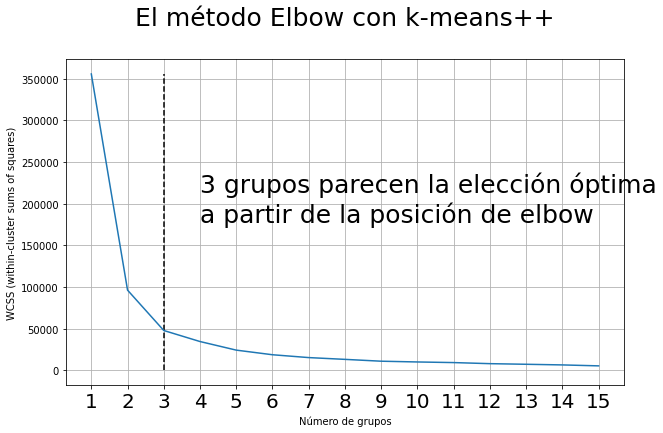

In [44]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=4, y=max(wcss) / 2, s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()

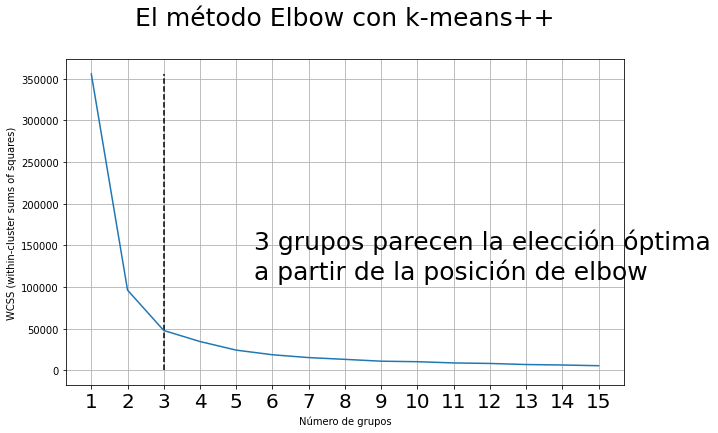

In [45]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=5.5, y=110000,s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()

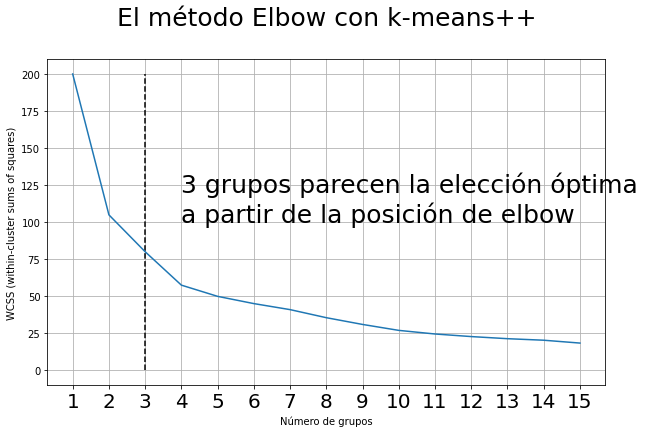

In [ ]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_Scaled_Media)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=4, y=max(wcss) / 2, s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()

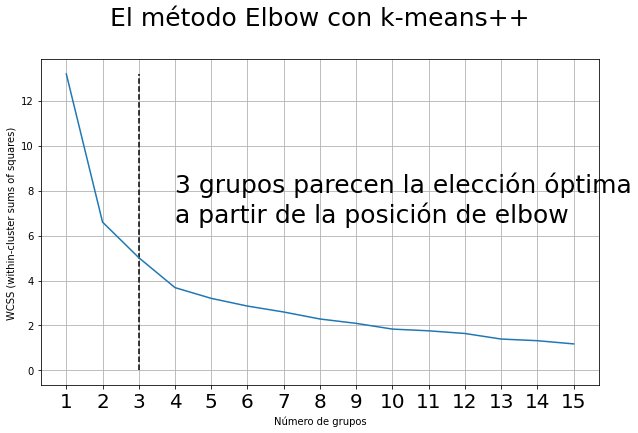

In [ ]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_Scaled_MinMax)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=4, y=max(wcss) / 2, s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()